Total Blocks:  1220
Total Length of List:  1220


first base fee:  62.278826439
last base fee:  55.576692957


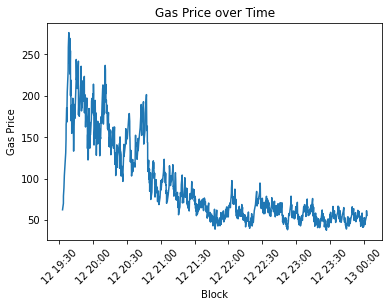

In [1]:
from web3 import Web3
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import time

ENDPOINT = "INSERT-YOUR-PROVIDER"
ETH_UNITS = 1e9  # to GWEI
w3 = Web3(Web3.HTTPProvider(ENDPOINT))


# start block
first_block = 13212868

# end block
last_block = 13214087
temp = last_block

blocks_to_grab = 1024
blocks_left = last_block - first_block + 1
print("Total Blocks: ", blocks_left)


block_list = []

while blocks_left > 0:
    blocks = w3.eth.fee_history(
        blocks_to_grab, last_block, [10, 90]
    )  # args: block_count, newest_block,
    last_block = blocks["oldestBlock"]

    blocks_to_grab = min(1024, last_block - first_block + 1)
    blocks_left -= len(blocks["baseFeePerGas"][:-1])

    new_start_of_list = blocks["baseFeePerGas"][:-1]
    new_start_of_list.extend(block_list[1:])
    block_list = new_start_of_list

# SANITY CHECKS
print("Total Length of List: ", len(block_list))

print("\n")

print("first base fee: ", block_list[0] / ETH_UNITS)  # 62.278826439 Gwei
print("last base fee: ", block_list[-1] / ETH_UNITS)  # 55.576692957 Gwei

block_numbers = list(range(first_block, temp + 1))
time_list = []

for i in range(0, len(block_list)):
    time_list.append(
        int(w3.eth.getBlock(block_numbers[i]).timestamp)
    )  #  timestamp of the current block in seconds since the epoch
    block_list[i] = block_list[i] / ETH_UNITS


data = pd.DataFrame()
data["block_numbers"] = block_numbers
data["timestamps"] = time_list
data["base_fee"] = block_list

data["timestamps"] = pd.to_datetime(data["timestamps"], unit="s")

data.to_csv("data/gas_data.csv")

plt.plot(data["timestamps"], block_list)
plt.title("Gas Price over Time")
plt.xlabel("Block")
plt.ylabel("Gas Price")
plt.xticks(rotation=45)

plt.savefig("figures/gas_chart.png", dpi=300)
plt.show()